In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
BASE_URL = "https://raw.githubusercontent.com/SurakshitKapoor/Urban-Mobility-Analytics-ML-Platform/main/csv_files/"


In [3]:
fact_trips = pd.read_csv(BASE_URL + "fact_trips.csv")
monthly_target_trips = pd.read_csv(BASE_URL + "monthly_target_trips.csv")
monthly_target_new_passengers = pd.read_csv(BASE_URL + "monthly_target_new_passengers.csv")
fact_passenger_summary = pd.read_csv(BASE_URL + "fact_passenger_summary.csv")
dim_repeat_trip_distribution = pd.read_csv(BASE_URL + "dim_repeat_trip_distribution.csv")
dim_date = pd.read_csv(BASE_URL + "dim_date.csv")
dim_city = pd.read_csv(BASE_URL + "dim_city.csv")
city_target_passenger_rating = pd.read_csv(BASE_URL + "city_target_passenger_rating.csv")


In [4]:
# fact_trips.info()
fact_trips['date'] = pd.to_datetime(fact_trips['date'] , dayfirst=True)

In [5]:
# monthly_target_trips
monthly_target_trips['month'] = pd.to_datetime(monthly_target_trips['month'], dayfirst=True )


In [6]:
monthly_target_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   month               60 non-null     datetime64[ns]
 1   city_id             60 non-null     object        
 2   total_target_trips  60 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.5+ KB


In [7]:
ans = monthly_target_trips['month'].dt.month.unique()
ans

array([3, 5, 4, 2, 1, 6], dtype=int32)

In [8]:
monthly_target_new_passengers['month'] = pd.to_datetime( monthly_target_new_passengers['month'], dayfirst=True )

In [9]:
fact_passenger_summary['month'] = pd.to_datetime(fact_passenger_summary['month'], dayfirst=True )


In [10]:
dim_repeat_trip_distribution['month'] = pd.to_datetime(dim_repeat_trip_distribution['month'], dayfirst=True)


In [11]:
# dim_date.info()
dim_date['date'] = pd.to_datetime(dim_date['date'], dayfirst=True)
dim_date['start_of_month'] = pd.to_datetime(dim_date['start_of_month'], dayfirst=True)

In [12]:
print(dim_date.date.dt.month.unique())
print(dim_date.date.dt.day.unique())

[1 2 3 4 5 6]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [13]:
# dim_city

In [14]:
# city_target_passenger_rating  

## Primary Questions

1. Top & Bottom 3 Cities by Total Trips

In [15]:
# trips per city
trips_by_city = (
    fact_trips
    .groupby("city_id")
    .size()
    .reset_index(name="total_trips")
    .merge(dim_city, on="city_id", how="left")
)

top_3_cities = trips_by_city.sort_values("total_trips", ascending=False).head(3)
bottom_3_cities = trips_by_city.sort_values("total_trips").head(3)


In [18]:
top_3_cities

,city_id,total_trips,city_name
7,RJ01,76888,Jaipur
9,UP01,64299,Lucknow
2,GJ01,54843,Surat


Recommendations:

1. Prioritize driver supply and reliability
2. Protect service quality (don’t let growth hurt ratings)
3. Use retention programs, not heavy discounts

In [19]:
bottom_3_cities

,city_id,total_trips,city_name
4,KA01,16238,Mysore
8,TN01,21104,Coimbatore
0,AP01,28366,Visakhapatnam


Recommendations:

1. Test partnerships (hotels, offices) or reposition service

***Insights:***
1. Jaipur, Lucknow, Surat drive a disproportionate share of total trips.
2. Mysore, Coimbatore, Visakhapatnam show structurally low demand, not random fluctuation


Growth is being carried by a few cities.
not push uniform growth everywhere.

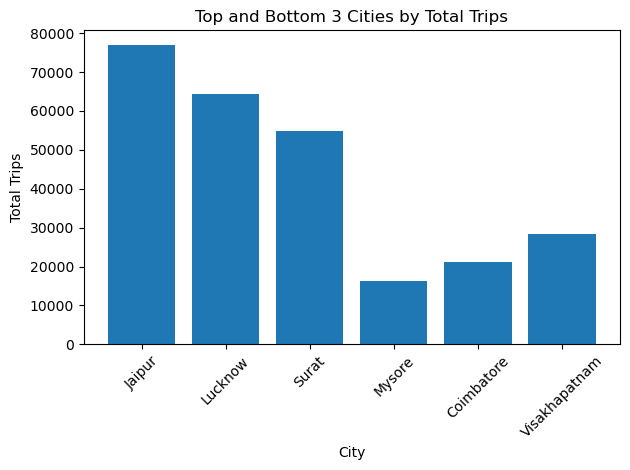

In [73]:
import matplotlib.pyplot as plt

# combine top & bottom
plot_data = pd.concat([top_3_cities, bottom_3_cities])

plt.figure()
plt.bar(plot_data["city_name"], plot_data["total_trips"])
plt.title("Top and Bottom 3 Cities by Total Trips")
plt.xlabel("City")
plt.ylabel("Total Trips")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2. Average Fare per Trip vs Average Distance (by City)

In [20]:
fare_distance_city = (
    fact_trips
    .groupby("city_id")
    .agg(
        avg_fare_per_trip=("fare_amount", "mean"),
        avg_distance_km=("distance_travelled(km)", "mean")
    )
    .reset_index()
    .merge(dim_city, on="city_id", how="left")
)

fare_distance_city

,city_id,avg_fare_per_trip,avg_distance_km,city_name
0,AP01,282.672284,22.553938,Visakhapatnam
1,CH01,283.686950,23.518714,Chandigarh
2,GJ01,117.272925,10.997247,Surat
3,GJ02,118.566165,11.517736,Vadodara
4,KA01,249.707168,16.496921,Mysore
5,KL01,335.245079,24.065461,Kochi
6,MP01,179.838609,16.502473,Indore
7,RJ01,483.918128,30.023125,Jaipur
8,TN01,166.982183,14.979198,Coimbatore
9,UP01,147.180376,12.512963,Lucknow


In [21]:
# optional: pricing efficiency
fare_distance_city["fare_per_km"] = (
    fare_distance_city["avg_fare_per_trip"] /
    fare_distance_city["avg_distance_km"]
)

highest_fare_city = fare_distance_city.sort_values("avg_fare_per_trip", ascending=False).head(1)
lowest_fare_city = fare_distance_city.sort_values("avg_fare_per_trip").head(1)

print("highest_fare_city:\n", highest_fare_city)
print()
print("*"*100)
print()
print("lowest_fare_city:\n", lowest_fare_city)

highest_fare_city:
   city_id  avg_fare_per_trip  avg_distance_km city_name  fare_per_km
7    RJ01         483.918128        30.023125    Jaipur     16.11818

****************************************************************************************************

lowest_fare_city:
   city_id  avg_fare_per_trip  avg_distance_km city_name  fare_per_km
2    GJ01         117.272925        10.997247     Surat    10.663844


***Insights:***
1. Jaipur has the highest average fare per trip and also the highest fare per km.
This indicates strong willingness to pay and/or longer, higher-value trips.

2. Surat has the lowest average fare per trip and low fare per km, despite decent trip volumes.


***Decision:***
Growth will not come only from more trips.
Improving pricing efficiency city-by-city can lift revenue without increasing volume.

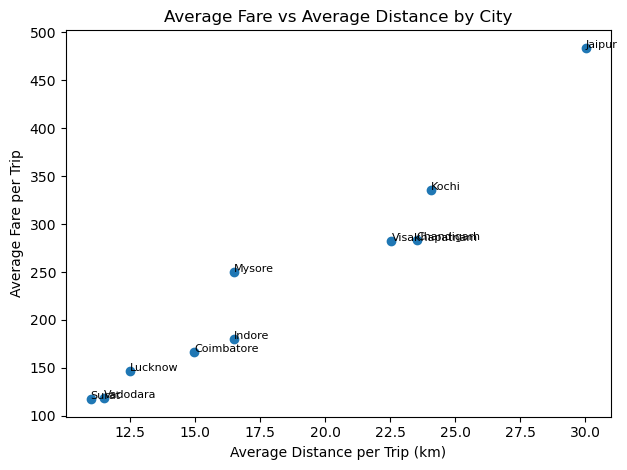

In [74]:

plt.figure()
plt.scatter(
    fare_distance_city["avg_distance_km"],
    fare_distance_city["avg_fare_per_trip"]
)

# label cities
for _, row in fare_distance_city.iterrows():
    plt.text(
        row["avg_distance_km"],
        row["avg_fare_per_trip"],
        row["city_name"],
        fontsize=8
    )

plt.xlabel("Average Distance per Trip (km)")
plt.ylabel("Average Fare per Trip")
plt.title("Average Fare vs Average Distance by City")
plt.tight_layout()
plt.show()


3. Average Ratings by City & Passenger Type

In [22]:
ratings_city_passenger = (
    fact_trips
    .groupby(["city_id", "passenger_type"])
    .agg(
        avg_passenger_rating=("passenger_rating", "mean"),
        avg_driver_rating=("driver_rating", "mean")
    )
    .reset_index()
    .merge(dim_city, on="city_id", how="left")
)

# print("average ratings by city and passenger types:\n")
# print(ratings_city_passenger)

In [23]:
ratings_wide = (
    ratings_city_passenger
    .pivot(
        index=["city_id", "city_name"],
        columns="passenger_type",
        values=["avg_passenger_rating", "avg_driver_rating"]
    )
    .reset_index()
)

In [24]:
ratings_wide

city_id      city_name avg_passenger_rating            \
passenger_type                                         new  repeated   
0                 AP01  Visakhapatnam             8.976151  7.989628   
1                 CH01     Chandigarh             8.489158  7.493798   
2                 GJ01          Surat             7.984173  5.995511   
3                 GJ02       Vadodara             7.979263  5.978629   
4                 KA01         Mysore             8.982964  7.978495   
5                 KL01          Kochi             8.987394  8.003665   
6                 MP01         Indore             8.485837  7.473961   
7                 RJ01         Jaipur             8.985018  7.991042   
8                 TN01     Coimbatore             8.485788  7.475457   
9                 UP01        Lucknow             7.977429  5.985741   

               avg_driver_rating            
passenger_type               new  repeated  
0                       8.979995  8.992701  
1                       7.992120  7.472824  
2                       6.994925  6.479441  
3                       7.004147  6.481072  
4                       8.982878  8.965767  
5                       8.985350  8.989830  
6                       7.970800  7.477404  
7                       8.988246  8.984790  
8                       7.990604  7.480778  
9                       6.990406  6.491663

***Insights:***

1. Repeat passenger ratings drop sharply in Surat, Vadodara, Lucknow.
2. Kochi, Jaipur, Mysore maintain strong ratings even for repeat users.

***Decision:***

`Retention risk is driven by declining experience, not acquisition quality.`

it means,
People like the service when they try it the first time,
but they don’t like it as much when they use it again.

So the problem is not attracting new customers.
The problem is keeping them happy after they come back.

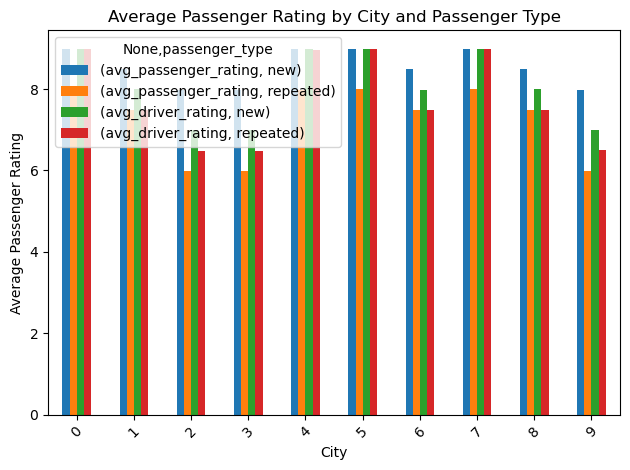

In [76]:
ratings_wide.plot(kind="bar")
plt.xlabel("City")
plt.ylabel("Average Passenger Rating")
plt.title("Average Passenger Rating by City and Passenger Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4. Peak & Low Demand Months by City

In [25]:
# add month to trips
fact_trips["month"] = pd.to_datetime(fact_trips["date"]).dt.to_period("M")

monthly_trips = (
    fact_trips
    .groupby(["city_id", "month"])
    .size()
    .reset_index(name="total_trips")
    .merge(dim_city, on="city_id", how="left")
)

monthly_trips



,city_id,month,total_trips,city_name
0,AP01,2024-01,4468,Visakhapatnam
1,AP01,2024-02,4793,Visakhapatnam
2,AP01,2024-03,4877,Visakhapatnam
3,AP01,2024-04,4938,Visakhapatnam
4,AP01,2024-05,4812,Visakhapatnam
5,AP01,2024-06,4478,Visakhapatnam
6,CH01,2024-01,6810,Chandigarh
7,CH01,2024-02,7387,Chandigarh
8,CH01,2024-03,6569,Chandigarh
9,CH01,2024-04,5566,Chandigarh


In [26]:
peak_low_months = (
    monthly_trips
    .sort_values("total_trips")
    .groupby("city_id")
    .agg(
        low_demand_month=("month", "first"),
        peak_demand_month=("month", "last")
    )
    .reset_index()
    .merge(dim_city, on="city_id", how="left")
)

print("***Low and High demand months per city:***\n")
peak_low_months

***Low and High demand months per city:***



,city_id,low_demand_month,peak_demand_month,city_name
0,AP01,2024-01,2024-04,Visakhapatnam
1,CH01,2024-04,2024-02,Chandigarh
2,GJ01,2024-01,2024-04,Surat
3,GJ02,2024-06,2024-04,Vadodara
4,KA01,2024-01,2024-05,Mysore
5,KL01,2024-06,2024-05,Kochi
6,MP01,2024-06,2024-05,Indore
7,RJ01,2024-06,2024-02,Jaipur
8,TN01,2024-06,2024-03,Coimbatore
9,UP01,2024-05,2024-02,Lucknow


***Insights:***
Demand is seasonal and varied by cities.
Most cities peak between Feb–May and drop in Jan or Jun.


***Decision:***
1. Increase driver availability and marketing before peak months.

2. Use low-demand months for:

retention offers; driver training; cost control

so, Matching supply and marketing to city-specific seasonality will improve efficiency and reduce waste.

5. Weekend vs Weekday Trip Demand by City

In [27]:
trips_day_type = (
    fact_trips
    .merge(dim_date, on="date", how="left")
    .groupby(["city_id", "day_type"])
    .size()
    .reset_index(name="total_trips")
    .merge(dim_city, on="city_id", how="left")
)

# trips_day_type

# pivot for clean view
trips_day_type_wide = (
    trips_day_type
    .pivot(index=["city_id", "city_name"], columns="day_type", values="total_trips")
    .reset_index()
)

print("Weekday and Weekend trips by cities:\n")
trips_day_type_wide

Weekday and Weekend trips by cities:



day_type,city_id,city_name,Weekday,Weekend
0,AP01,Visakhapatnam,15100,13266
1,CH01,Chandigarh,19914,19067
2,GJ01,Surat,37793,17050
3,GJ02,Vadodara,20310,11716
4,KA01,Mysore,6424,9814
5,KL01,Kochi,22915,27787
6,MP01,Indore,21198,21258
7,RJ01,Jaipur,32491,44397
8,TN01,Coimbatore,12576,8528
9,UP01,Lucknow,49617,14682


Insights:

1. Jaipur, Kochi, Mysore see higher weekend demand -> leisure/tourism driven.
2. Surat, Vadodara, Lucknow are strongly weekday-heavy -> work/commute driven.
3. Indore shows balanced demand.


***Decisions:*** `Avoid one-size-fits-all promotions.`
1. Weekend-heavy cities: boost supply and surge control on weekends.

2. Weekday-heavy cities: focus on office-hour reliability and subscriptions.



6. Repeat Passenger Frequency & City Contribution

In [30]:
repeat_freq = (
    dim_repeat_trip_distribution
    .merge(dim_city, on="city_id", how="left")
)

repeat_freq

,month,city_id,trip_count,repeat_passenger_count,city_name
0,2024-01-01,AP01,10-Trips,7,Visakhapatnam
1,2024-01-01,AP01,2-Trips,352,Visakhapatnam
2,2024-01-01,AP01,3-Trips,158,Visakhapatnam
3,2024-01-01,AP01,4-Trips,53,Visakhapatnam
4,2024-01-01,AP01,5-Trips,38,Visakhapatnam
...,...,...,...,...,...
535,2024-06-01,UP01,5-Trips,272,Lucknow
536,2024-06-01,UP01,6-Trips,272,Lucknow
537,2024-06-01,UP01,7-Trips,246,Lucknow
538,2024-06-01,UP01,8-Trips,83,Lucknow


7. Monthly Target Achievement (Trips, New Passengers, Ratings)

(for every city)

In [57]:
# for Trips

fact_trips.rename(columns={'month':'month_year'}, inplace=True)


In [65]:
# creating a new col. with proper naming
monthly_target_trips['month_year'] = monthly_target_trips['month'].dt.to_period("M")
# monthly_target_trips

In [72]:
# fact_trips.head()

result = (fact_trips.groupby(['city_id', 'month_year']).agg(actual_total_trips=("trip_id", "count")).reset_index()
        .merge(monthly_target_trips, on=['city_id', 'month_year'], how='left') )

# result

result['trips_pct_age'] = round( (result['actual_total_trips'] / result['total_target_trips']) * 100, 2)
result

,city_id,month_year,actual_total_trips,month,total_target_trips,trips_pct_age
0,AP01,2024-01,4468,2024-01-01,4500,99.29
1,AP01,2024-02,4793,2024-02-01,4500,106.51
2,AP01,2024-03,4877,2024-03-01,4500,108.38
3,AP01,2024-04,4938,2024-04-01,5000,98.76
4,AP01,2024-05,4812,2024-05-01,5000,96.24
5,AP01,2024-06,4478,2024-06-01,5000,89.56
6,CH01,2024-01,6810,2024-01-01,7000,97.29
7,CH01,2024-02,7387,2024-02-01,7000,105.53
8,CH01,2024-03,6569,2024-03-01,7000,93.84
9,CH01,2024-04,5566,2024-04-01,6000,92.77


In [34]:
# ---- New passenger target achievement
new_passenger_perf = (
    fact_passenger_summary
    .merge(monthly_target_new_passengers, on=["city_id", "month"], how="left")
)

new_passenger_perf["new_passenger_achievement_pct"] = (
    (new_passenger_perf["new_passengers"] - new_passenger_perf["target_new_passengers"])
    / new_passenger_perf["target_new_passengers"]
) * 100

new_passenger_perf.head(14)

,month,city_id,new_passengers,repeat_passengers,total_passengers,target_new_passengers,new_passenger_achievement_pct
0,2024-01-01,AP01,2513,650,3163,2500,0.520000
1,2024-01-01,CH01,3920,720,4640,4000,-2.000000
2,2024-01-01,GJ01,2432,1184,3616,2000,21.600000
3,2024-01-01,GJ02,2089,544,2633,1800,16.055556
4,2024-01-01,KA01,1957,172,2129,2000,-2.150000
5,2024-01-01,KL01,4865,795,5660,5000,-2.700000
6,2024-01-01,MP01,2843,1033,3876,2700,5.296296
7,2024-01-01,RJ01,10423,1422,11845,12000,-13.141667
8,2024-01-01,TN01,1822,392,2214,1500,21.466667
9,2024-01-01,UP01,3465,1431,4896,3200,8.281250


In [40]:
# ---- Rating vs target
rating_perf = (
    fact_trips
    .groupby(["city_id"])
    .agg(actual_avg_rating=("passenger_rating", "mean"))
    .reset_index()
    .merge(city_target_passenger_rating, on="city_id", how="left")
)

rating_perf["rating_gap"] = (
    rating_perf["actual_avg_rating"] -
    rating_perf["target_avg_passenger_rating"]
)

rating_perf

,city_id,actual_avg_rating,target_avg_passenger_rating,rating_gap
0,AP01,8.432948,8.50,-0.067052
1,CH01,7.976604,8.00,-0.023396
2,GJ01,6.417081,7.00,-0.582919
3,GJ02,6.611253,7.50,-0.888747
4,KA01,8.701072,8.50,0.201072
5,KL01,8.516193,8.50,0.016193
6,MP01,7.828199,8.00,-0.171801
7,RJ01,8.583849,8.25,0.333849
8,TN01,7.883055,8.25,-0.366945
9,UP01,6.489401,7.25,-0.760599


8. Repeat Passenger Rate (RPR%) – City & Month

In [45]:
# ---- RPR by city-month
rpr_city_month = (
    fact_passenger_summary
    .assign(
        RPR_pct=lambda x: (x["repeat_passengers"] / x["total_passengers"]) * 100
    )
    .merge(dim_city, on="city_id", how="left")
)

# rpr_city_month

# ---- Top & Bottom 2 cities (overall)
rpr_city = (
    rpr_city_month
    .groupby("city_name")
    .agg(avg_RPR_pct=("RPR_pct", "mean"))
    .reset_index()
)

top_2_cities = rpr_city.sort_values("avg_RPR_pct", ascending=False).head(2)
print("top-2 cities: \n", top_2_cities)
print()
print("*"*60)
print()
bottom_2_cities = rpr_city.sort_values("avg_RPR_pct").head(2)
print("bottom-2 cities:\n", bottom_2_cities)


top-2 cities: 
   city_name  avg_RPR_pct
7     Surat    42.963123
5   Lucknow    38.131873

************************************************************

bottom-2 cities:
   city_name  avg_RPR_pct
6    Mysore    11.208195
3    Jaipur    18.329207


***Insights:***
1. Surat, Lucknow: high repeat use -> people rely on cabs regularly.

2. Jaipur, Mysore: low repeat use -> trips are occasional (tourism/leisure).

***Decisions:***
1. In high-repeat cities: focus on loyalty and subscriptions.

2. In low-repeat cities: focus on peak demand and revenue per trip, not retention.

In [46]:
# ---- Highest & Lowest RPR months (overall)
rpr_month = (
    rpr_city_month
    .groupby("month")
    .agg(avg_RPR_pct=("RPR_pct", "mean"))
    .reset_index()
)

highest_rpr_month = rpr_month.sort_values("avg_RPR_pct", ascending=False).head(1)
print("highest RPR months:\n", highest_rpr_month)
print()
print("*"*70)
print()
lowest_rpr_month = rpr_month.sort_values("avg_RPR_pct").head(1)
print("lowest RPR months:\n", lowest_rpr_month)

highest RPR months:
        month  avg_RPR_pct
4 2024-05-01     34.21841

**********************************************************************

lowest RPR months:
        month  avg_RPR_pct
0 2024-01-01    19.718611


***Insights:***

1. May shows the highest repeat usage -> stable, routine travel.
2. January has the lowest repeat usage -> more first-time or seasonal users.

***Decisions:***

1. Push loyalty and repeat offers before and during May.
2. Use January for acquisition and awareness, not retention KPIs.

### Conclusion:

City-specific execution, not more data or more discounts, is the biggest lever for sustainable growth.